In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [6]:
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [14]:
inde=dataset[['User ID', 'Age', 'EstimatedSalary','Gender_Male']]

In [15]:
dep=dataset[['Purchased']]

In [13]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [16]:
inde.shape

(400, 4)

In [17]:
dep

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(inde ,dep ,test_size=0.30, random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

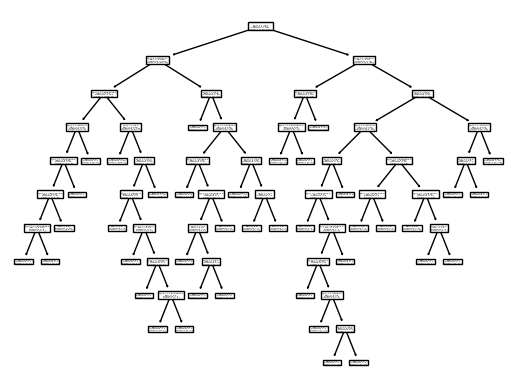

In [20]:
from sklearn import tree
tree.plot_tree(classifier)
plt.show

In [22]:
y_pred=classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred, y_test)

In [24]:
cm


array([[73,  6],
       [ 6, 35]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
cf= classification_report(y_pred, y_test)

In [32]:
print(cf)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        79
           1       0.85      0.85      0.85        41

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120

